<a href="https://colab.research.google.com/github/gracekavemba/cyberpro_week_5_Assignment/blob/main/Temperature_Prediction_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.


## Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.


## Workflow
1. Load the dataset  
2. Explore and clean the data  
3. Train a regression model  
4. Evaluate predictions


In [35]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [36]:
# Load the dataset
df = pd.read_csv("humidity.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


## Exploratory Data Analysis


In [37]:
# Check for missing values
df.isnull().sum()

# Display summary statistics
df.describe()



,sensor_id,lat,lon,pressure,temperature,humidity
count,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000
mean,2835.419842,42.679722,23.333739,94965.292500,24.754990,48.348949
std,798.018890,0.025568,0.039365,2577.210945,14.013001,20.907247
min,1764.000000,42.622000,23.240000,0.000000,-145.120000,0.000000
25%,2224.000000,42.665000,23.310000,94528.017500,20.630000,34.140000
50%,2323.000000,42.685000,23.332000,95005.480000,24.780000,48.350000
75%,3474.000000,42.694000,23.360000,95405.132500,29.870000,62.940000
max,4661.000000,42.738000,23.419000,164926.750000,61.170000,100.000000


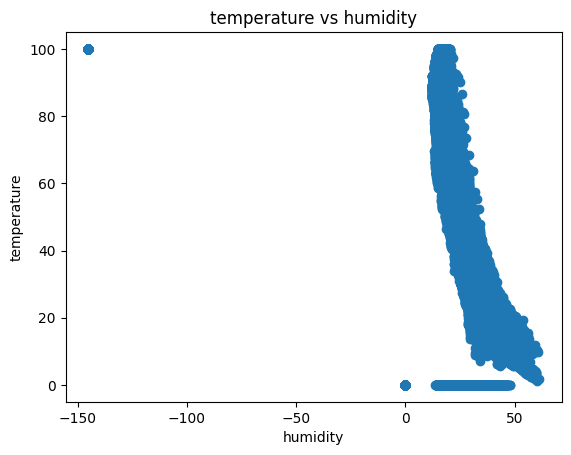

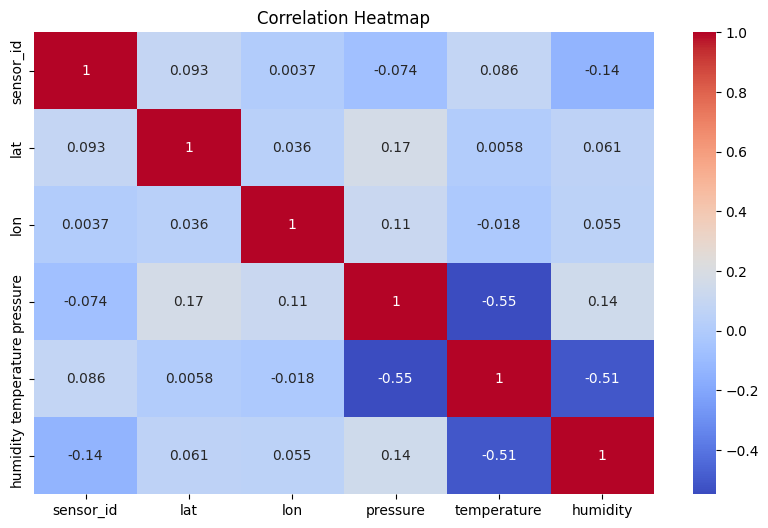

             sensor_id       lat       lon  pressure  temperature  humidity
sensor_id     1.000000  0.093120  0.003730 -0.073571     0.085845 -0.140057
lat           0.093120  1.000000  0.036192  0.168057     0.005760  0.060758
lon           0.003730  0.036192  1.000000  0.112594    -0.017762  0.054816
pressure     -0.073571  0.168057  0.112594  1.000000    -0.547503  0.144252
temperature   0.085845  0.005760 -0.017762 -0.547503     1.000000 -0.507828
humidity     -0.140057  0.060758  0.054816  0.144252    -0.507828  1.000000


In [42]:
# Scatter plot to observe relationship
plt.scatter(df["temperature"], df["humidity"])
plt.xlabel("humidity")
plt.ylabel("temperature")
plt.title("temperature vs humidity")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

correlation_matrix = df.corr()

print(correlation_matrix)





## Data Preprocessing

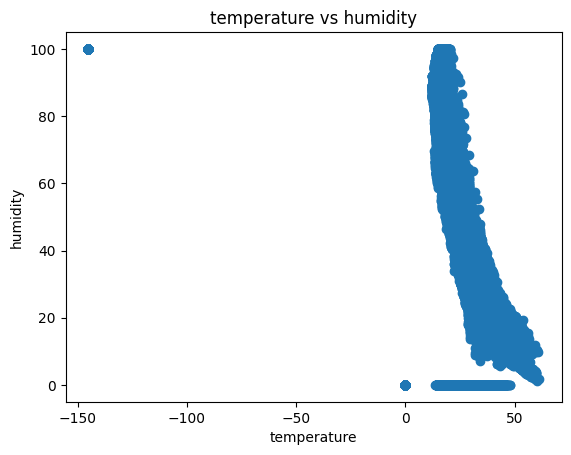

In [44]:
# Drop any rows with missing values


# Define features and target
df=df[['temperature','humidity']]
df
x=df['temperature']
y=df['humidity']
# Split the data into training and testing sets
plt.scatter(x,y)
plt.xlabel("temperature")
plt.ylabel("humidity")
plt.title("temperature vs humidity")
plt.show()




# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train=x_train.values.reshape(-1, 1)
y_train=y_train.values.reshape(-1, 1)
x_test=x_test.values.reshape(-1, 1)
y_test=y_test.values.reshape(-1, 1)





## Model Training

In [45]:
# Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)
y_pred.flatten()



# Predict




array([54.52379167, 43.27629626, 51.41503537, ..., 44.74368974,
       45.06137287, 54.63724993])

## Evaluation


In [46]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 326.1828055107713
R-squared: 0.2570619334024805


## Conclusion
- A simple linear regression model was used to predict temperature from humidity.  
- Consider using polynomial regression or time-series models for more complex patterns.
